# Open Powerlifiting Datascience Project!

#### Libraries and Dependencies

In [54]:
import re
import json
import requests as r
from bs4 import BeautifulSoup as bs 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import display
import seaborn as sns
import warnings

#### Getting the Data 

In [55]:
# Open powerlifting does not have an api so lets scape some data!!!
def scape_url(url):
    response = r.get(url)
    
    if response.status_code == 200:
        soup = bs(response.content, 'html.parser')
        pattern = re.compile(r'const initial_data = ({.*?});', re.DOTALL)
        match = pattern.search(str(soup))
        
        if match:
            initial_data_json = match.group(1)
            initial_data_dict = json.loads(initial_data_json)
            # Assuming 'rows' key exists in initial_data_dict
            rows = initial_data_dict.get('rows', [])
            # Now chuck these into a pandas dataframe 
            df = pd.DataFrame(rows, columns=['ID', 'Rank', 'Name', 'Name2', 'Tnstagram', 'Textcolor', 'Country', 'Location', 'Federation', 'Date', 'Country2', 'Region', 'Fed-version', 'Sex', 'Equiptment', 'Age', 'Age_Class', 'Weight', 'Weight_Class', 'Squat', 'Bench', 'Deadlift', 'Total', 'Dots'])
            
            return df 
            
        else:
            print("Error: 'const initial_data' not found in HTML content")
            return None
        
        
    else:
        print("Error: unable to retrieve data recieved error code: {response.status_code}")

# Url goes to endpoint showing all ferderations, all sexes, all weight classes, all years and full power and raw only (equipped is cheating)
open_powerlifting_url = "https://www.openpowerlifting.org/rankings/raw/full-power"

op_df = scape_url(open_powerlifting_url)

# Check that out datafram has been setup correctly
op_df.head()

# Now lets save this data for later! into a .csv file and timestamp it
op_df.to_csv('./data/csv/full-power-global-rankings.csv', index=False)
op_df.to_excel('./data/xls/full-power-global-rankings.xlsx', index=False, engine='openpyxl')

#### Cleaning the Data 

In [56]:
# Lets have a look at our data! and see what we can find within it or if we need to clean it a little!
display(op_df.head(10))

,ID,Rank,Name,Name2,Tnstagram,Textcolor,Country,Location,Federation,Date,...,Equiptment,Age,Age_Class,Weight,Weight_Class,Squat,Bench,Deadlift,Total,Dots
0,0,1,Kristy Hawkins,kristyhawkins,kristy_hawkins,green,USA,USA-CA,WRPF,2022-12-04,...,Raw,42,Open,73.6,75,265,150,272.5,687.5,676.36
1,1,2,John Haack,johnhaack,bilbo_swaggins181,None,USA,USA-CA,WRPF,2022-07-29,...,Raw,29,Open,89.9,90,345,267.5,410,1022.5,661.52
2,2,3,Marianna Gasparyan,mariannagasparyan,power_mayan,None,None,None,USPA,2019-08-03,...,Raw,30,Open,57.7,60,230,132.5,217.5,580,659.24
3,3,4,Chakera Ingram,chakeraingram,c.c_ingram,None,USA,USA-TX,USPA,2018-06-02,...,Raw,23,Juniors 20-23,81.5,82.5,245,165,282.5,692.5,646.55
4,4,5,Samantha Rice,samantharice,quadslikemom,None,USA,USA-TX,USA-UA,2023-04-08,...,Raw,32,Open,84.4,90,267.5,155,280,702.5,644.77
5,5,6,Hunter Henderson #1,hunterhenderson1,huntermhenderson,None,USA,None,WRPF,2023-02-18,...,Raw,28,Pro Open,81.4,82.5,267.5,152.5,250,670,625.92
6,6,7,Jamal Browner,jamalbrowner,jamal_b15,None,USA,USA-TX,USPA,2022-09-24,...,Raw,27,Open,109.4,110,370,227.5,455,1052.5,624.65
7,7,8,Raymond Phillips,raymondphillips,rayphillips1828,None,USA,USA-NJ,RPS,2024-01-27,...,Raw,38,Pro Open,63.6,67.5,276.6,163.2,331.1,771.1,620.75
8,8,9,Blake Lehew,blakelehew,deadliftingorangutan,None,USA,USA-TX,USA-UA,2023-04-08,...,Raw,27,Open,82.3,82.5,320,220,375,915,620.67
9,9,10,Jawon Garrison,jawongarrison,majin_avenger2.0,red,USA,USA-AL,WRPF,2023-10-28,...,Raw,35,Open,82.5,82.5,353,230,332.5,915.5,620.15


In [57]:
# As we can see there are a few repeating and redundant rows lets remove them
op_df.drop(['Name2', 'ID', 'Tnstagram', 'Textcolor', 'Country', 'Location', 'Country2', 'Region', 'Fed-version'], axis=1, inplace=True)

# I have also jsut realsied that a lot of the data is technically in string form still so I will convet it to numerical data for an easier time graphing thing 
op_df['Squat'] = pd.to_numeric(op_df['Squat'], errors='coerce')
op_df['Bench'] = pd.to_numeric(op_df['Bench'], errors='coerce')
op_df['Deadlift'] = pd.to_numeric(op_df['Deadlift'], errors='coerce')
op_df['Total'] = pd.to_numeric(op_df['Total'], errors='coerce')
op_df['Dots'] = pd.to_numeric(op_df['Dots'], errors='coerce')
op_df['Weight'] = pd.to_numeric(op_df['Weight'], errors='coerce')
op_df['Age'] = pd.to_numeric(op_df['Age'], errors='coerce')
op_df['Weight_Class'] = pd.to_numeric(op_df['Weight_Class'], errors='coerce')

# Gaze at sexy cleansed data (It looks so much better now)
display(op_df.head(10))


,Rank,Name,Federation,Date,Sex,Equiptment,Age,Age_Class,Weight,Weight_Class,Squat,Bench,Deadlift,Total,Dots
0,1,Kristy Hawkins,WRPF,2022-12-04,F,Raw,42.0,Open,73.6,75.0,265.0,150.0,272.5,687.5,676.36
1,2,John Haack,WRPF,2022-07-29,M,Raw,29.0,Open,89.9,90.0,345.0,267.5,410.0,1022.5,661.52
2,3,Marianna Gasparyan,USPA,2019-08-03,F,Raw,30.0,Open,57.7,60.0,230.0,132.5,217.5,580.0,659.24
3,4,Chakera Ingram,USPA,2018-06-02,F,Raw,23.0,Juniors 20-23,81.5,82.5,245.0,165.0,282.5,692.5,646.55
4,5,Samantha Rice,USA-UA,2023-04-08,F,Raw,32.0,Open,84.4,90.0,267.5,155.0,280.0,702.5,644.77
5,6,Hunter Henderson #1,WRPF,2023-02-18,F,Raw,28.0,Pro Open,81.4,82.5,267.5,152.5,250.0,670.0,625.92
6,7,Jamal Browner,USPA,2022-09-24,M,Raw,27.0,Open,109.4,110.0,370.0,227.5,455.0,1052.5,624.65
7,8,Raymond Phillips,RPS,2024-01-27,M,Raw,38.0,Pro Open,63.6,67.5,276.6,163.2,331.1,771.1,620.75
8,9,Blake Lehew,USA-UA,2023-04-08,M,Raw,27.0,Open,82.3,82.5,320.0,220.0,375.0,915.0,620.67
9,10,Jawon Garrison,WRPF,2023-10-28,M,Raw,35.0,Open,82.5,82.5,353.0,230.0,332.5,915.5,620.15


#### Exploring the data

(100, 15)

,Rank,Age,Weight,Weight_Class,Squat,Bench,Deadlift,Total,Dots
count,100.000000,82.000000,100.000000,77.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,29.085366,90.761000,92.831169,299.398000,191.248000,322.944000,813.509000,591.462500
std,29.011492,5.021439,27.497507,25.583019,77.509539,52.895566,74.117405,195.448687,21.088053
min,1.000000,21.000000,50.200000,52.000000,165.000000,95.000000,140.000000,465.000000,568.980000
25%,25.750000,26.000000,68.375000,74.000000,227.250000,146.875000,249.625000,607.875000,575.680000
50%,50.500000,29.000000,89.100000,90.000000,310.000000,200.000000,338.750000,872.500000,586.290000
75%,75.250000,31.750000,108.050000,110.000000,356.625000,230.000000,380.750000,960.625000,598.735000
max,100.000000,43.000000,178.200000,140.000000,470.000000,292.500000,467.500000,1152.500000,676.360000


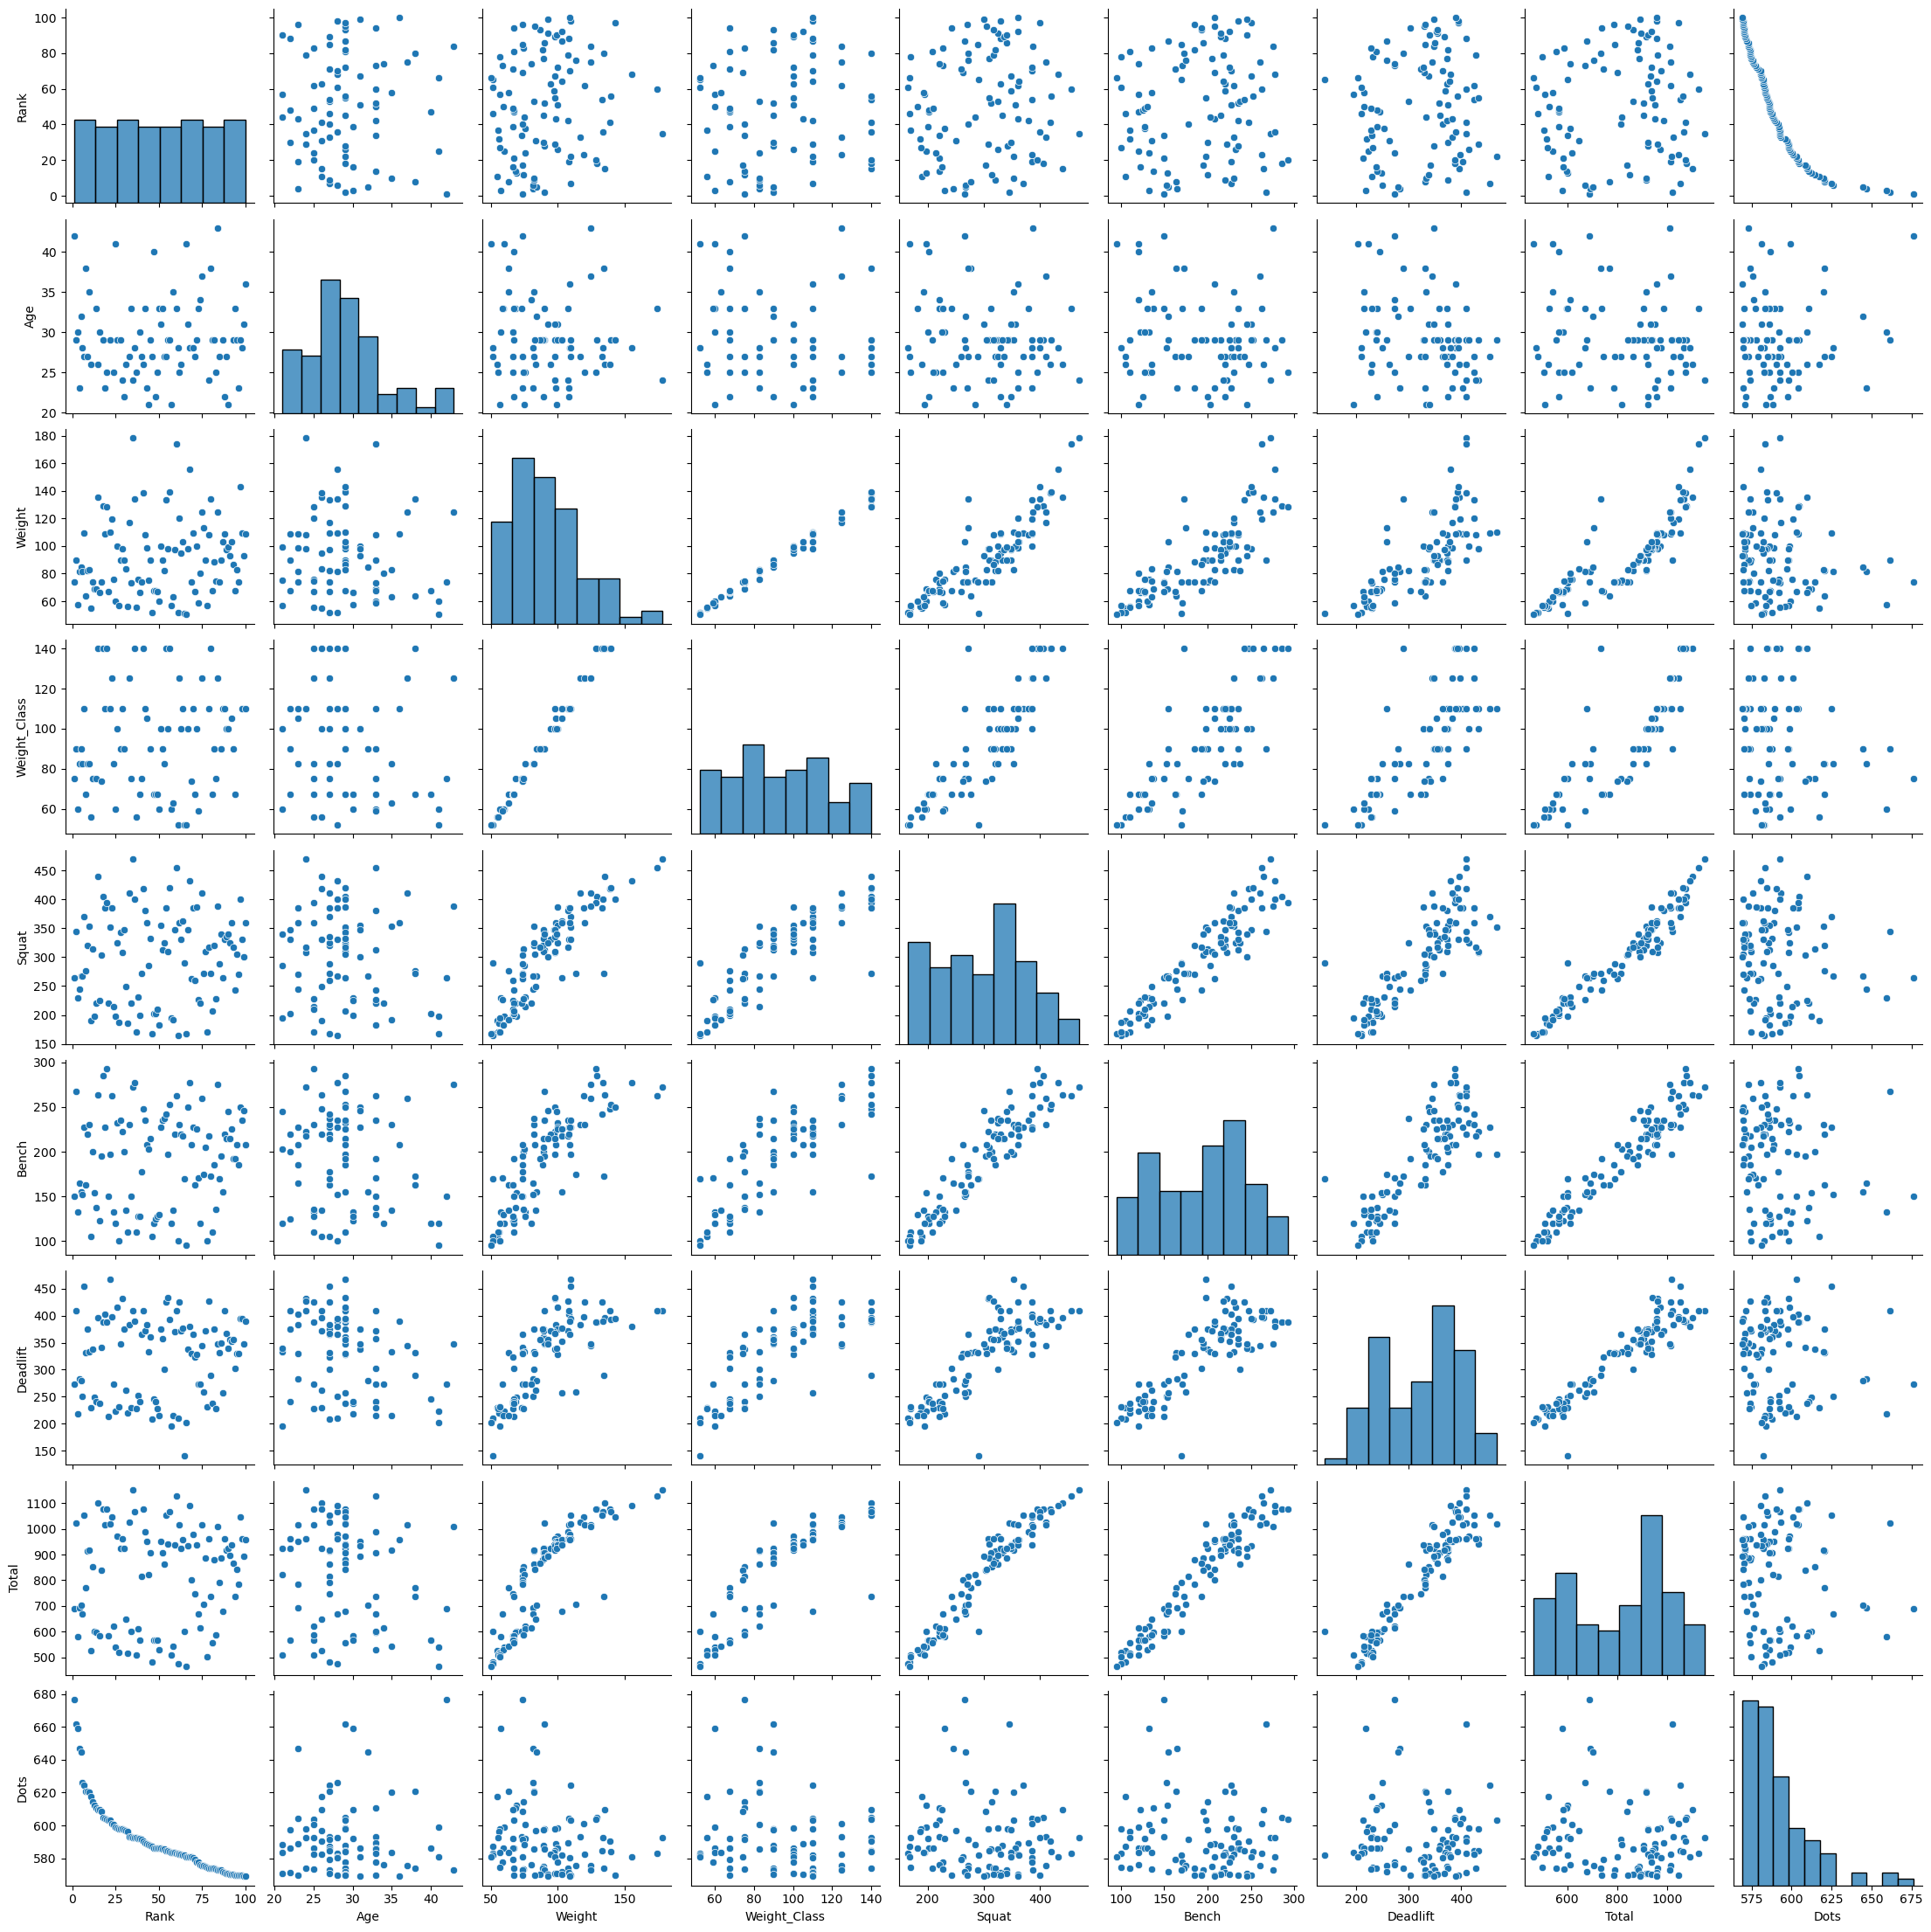

In [58]:
# Lets learn a little more about our dataset
display(op_df.shape)
# Cool so we know that we have the top 100 raw lifters in the world by dots score!!! 
display(op_df.describe())
# Sweet seems about right, lets do some data visualisations now!!!!!
# Now lets make some pairplots with our new sexy data!
warnings.filterwarnings("ignore") # gets rid out annoying warnings
display(sns.pairplot(op_df))

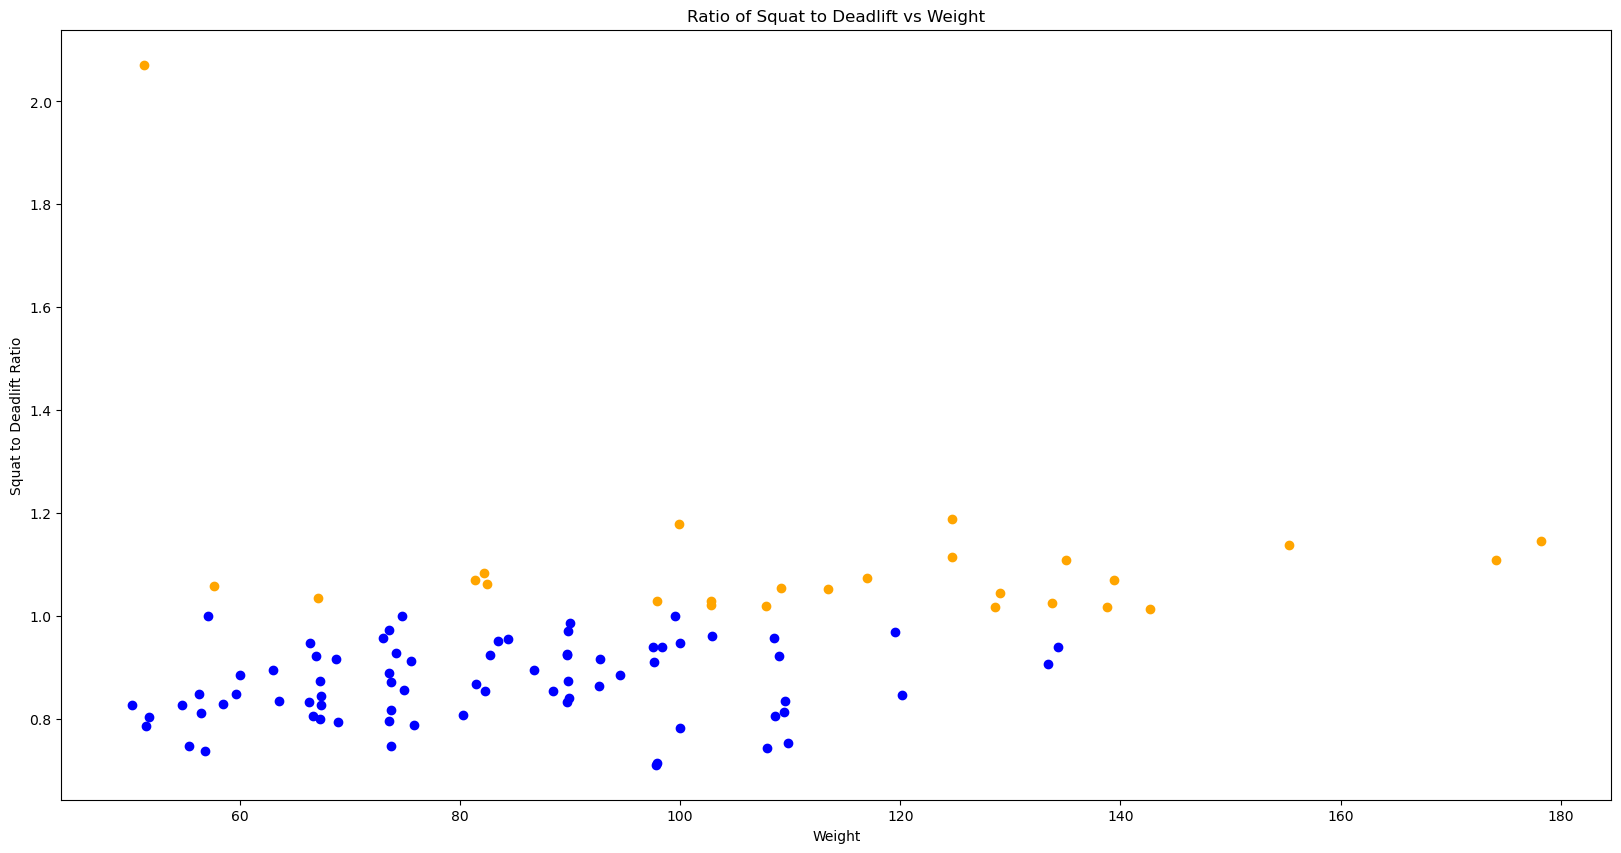

In [59]:
# I want to see if the trend of hevier lifters having a bigger squat then deadlift is true
# Sort the DataFrame by the 'Weight' column in ascending order
weight_sorted_df =  op_df.sort_values(by='Weight', ascending=True, inplace=False)
# Drop rows with missing values (NaNs) if necessary
weight_sorted_df.dropna(subset=['Squat', 'Deadlift'], inplace=True)

# Calculate the ratio between 'Squat' and 'Deadlift'
weight_sorted_df['Squat_to_Deadlift_Ratio'] = weight_sorted_df['Squat'] / weight_sorted_df['Deadlift']

# Create scatter plot
plt.figure(figsize=(20, 10))
# Plot lifter with bigger squat than dead in orange
x_vals, y_vals = weight_sorted_df['Weight'], weight_sorted_df['Squat_to_Deadlift_Ratio']
for x_val, y_val in zip(x_vals, y_vals):
    if y_val > 1:
        plt.scatter(x_val, y_val, color='orange', label='Squat > Dead')
    else:
        plt.scatter(x_val, y_val, color='blue', label='Squat < Dead')
plt.title('Ratio of Squat to Deadlift vs Weight')
plt.xlabel('Weight')
plt.ylabel('Squat to Deadlift Ratio')
plt.show()

# Below is really cool and shows that as lifters get bigger there are more of them that outsquat their deadlift, could be due to how leverages change as people get bigger

This supports a trend observed in bigger lifter that as they gain in mass their leverages for the squat become more advantageous and their deadlift leverages become less advantageous

# Big Development!

Apparently there is an api I can use to get this data easily haha using the following url: 
https://www.openpowerlifting.org/api/rankings?start=500&end=599&lang=en&units=kg

So Lets restart the project a little and download a lot and I mean a lot more data!!! We are just getting started!!
After doing a litte experimenting it seems we are able to get the data in blocks of 100 lifters, so lets see how many lifters there are and make a function that allows us to create a massive dataframe with all of our lifters data and save it to a csv file!! Lets go! We have access to also 500,000 lifters but a lot of the later data seems to be missing so I have decided to take the top 250,000 lifters in the world. 

In [60]:
import requests
import pandas as pd


def get_lifter_df():
    dfs = []
    for i in range(2500):
        response = requests.get("https://www.openpowerlifting.org/api/rankings/raw?start=" + str(i*100) + "&end=" + str(i*100 + 99) + "&lang=en&units=kg")
        
        if response.status_code == 200:
            data = response.json()
            
            df = pd.DataFrame(data["rows"], columns=['ID', 'Rank', 'Name', 'Name2', 'Tnstagram', 'Textcolor', 'Country', 'Location', 'Federation', 'Date', 'Country2', 'Region', 'Fed-version', 'Sex', 'Equiptment', 'Age', 'Age_Class', 'Weight', 'Weight_Class', 'Squat', 'Bench', 'Deadlift', 'Total', 'Dots'])
            
            dfs.append(df)
            
        else:
            print(f"Error fetching data from the API for endpoint {i}: {response.status_code}")
            
    # Create Master Dataframe
    return pd.concat(dfs, ignore_index=True)
    
lifter_df = get_lifter_df()

In [61]:
lifter_df.head(10)

,ID,Rank,Name,Name2,Tnstagram,Textcolor,Country,Location,Federation,Date,...,Equiptment,Age,Age_Class,Weight,Weight_Class,Squat,Bench,Deadlift,Total,Dots
0,0,1,Kristy Hawkins,kristyhawkins,kristy_hawkins,green,USA,USA-CA,WRPF,2022-12-04,...,Raw,42,Open,73.6,75,265,150,272.5,687.5,676.36
1,1,2,John Haack,johnhaack,bilbo_swaggins181,None,USA,USA-CA,WRPF,2022-07-29,...,Raw,29,Open,89.9,90,345,267.5,410,1022.5,661.52
2,2,3,Marianna Gasparyan,mariannagasparyan,power_mayan,None,None,None,USPA,2019-08-03,...,Raw,30,Open,57.7,60,230,132.5,217.5,580,659.24
3,3,4,Chakera Ingram,chakeraingram,c.c_ingram,None,USA,USA-TX,USPA,2018-06-02,...,Raw,23,Juniors 20-23,81.5,82.5,245,165,282.5,692.5,646.55
4,4,5,Samantha Rice,samantharice,quadslikemom,None,USA,USA-TX,USA-UA,2023-04-08,...,Raw,32,Open,84.4,90,267.5,155,280,702.5,644.77
5,5,6,Hunter Henderson #1,hunterhenderson1,huntermhenderson,None,USA,None,WRPF,2023-02-18,...,Raw,28,Pro Open,81.4,82.5,267.5,152.5,250,670,625.92
6,6,7,Jamal Browner,jamalbrowner,jamal_b15,None,USA,USA-TX,USPA,2022-09-24,...,Raw,27,Open,109.4,110,370,227.5,455,1052.5,624.65
7,7,8,Raymond Phillips,raymondphillips,rayphillips1828,None,USA,USA-NJ,RPS,2024-01-27,...,Raw,38,Pro Open,63.6,67.5,276.6,163.2,331.1,771.1,620.75
8,8,9,Blake Lehew,blakelehew,deadliftingorangutan,None,USA,USA-TX,USA-UA,2023-04-08,...,Raw,27,Open,82.3,82.5,320,220,375,915,620.67
9,9,10,Jawon Garrison,jawongarrison,majin_avenger2.0,red,USA,USA-AL,WRPF,2023-10-28,...,Raw,35,Open,82.5,82.5,353,230,332.5,915.5,620.15


In [62]:
lifter_df.shape

(250000, 24)

In [63]:
lifter_df.head(200)

,ID,Rank,Name,Name2,Tnstagram,Textcolor,Country,Location,Federation,Date,...,Equiptment,Age,Age_Class,Weight,Weight_Class,Squat,Bench,Deadlift,Total,Dots
0,0,1,Kristy Hawkins,kristyhawkins,kristy_hawkins,green,USA,USA-CA,WRPF,2022-12-04,...,Raw,42,Open,73.6,75,265,150,272.5,687.5,676.36
1,1,2,John Haack,johnhaack,bilbo_swaggins181,None,USA,USA-CA,WRPF,2022-07-29,...,Raw,29,Open,89.9,90,345,267.5,410,1022.5,661.52
2,2,3,Marianna Gasparyan,mariannagasparyan,power_mayan,None,None,None,USPA,2019-08-03,...,Raw,30,Open,57.7,60,230,132.5,217.5,580,659.24
3,3,4,Chakera Ingram,chakeraingram,c.c_ingram,None,USA,USA-TX,USPA,2018-06-02,...,Raw,23,Juniors 20-23,81.5,82.5,245,165,282.5,692.5,646.55
4,4,5,Samantha Rice,samantharice,quadslikemom,None,USA,USA-TX,USA-UA,2023-04-08,...,Raw,32,Open,84.4,90,267.5,155,280,702.5,644.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,196,Andrea White,andreawhite,None,None,USA,USA-PA,USPA,2018-11-17,...,Raw,40,Masters 40-44,67.1,67.5,175,137.5,222.5,535,554.23
196,196,197,Noémie Allabert,noemieallabert,noemieallabert,france,France,None,IPF,2023-03-25,...,Raw,32,Open,51.9,,171.5,87.5,195,454,554.12
197,197,198,Monique Jackson,moniquejackson,None,None,USA,USA-GA,USPA,2015-10-31,...,Raw,44,Open,67.5,67.5,173,141,222.5,536.5,553.88
198,198,199,Kirk Karwoski,kirkkarwoski,kirk_karwoski,None,USA,USA-MD,AAU,2004-12-01,...,Raw,38,Open,110,110,375,210,350,935,553.77


#### Data Cleansing Again :(

In [64]:
# I have also jsut realsied that a lot of the data is technically in string form still so I will convet it to numerical data for an easier time graphing thing 
lifter_df['Squat'] = pd.to_numeric(lifter_df['Squat'], errors='coerce')
lifter_df['Bench'] = pd.to_numeric(lifter_df['Bench'], errors='coerce')
lifter_df['Deadlift'] = pd.to_numeric(lifter_df['Deadlift'], errors='coerce')
lifter_df['Total'] = pd.to_numeric(lifter_df['Total'], errors='coerce')
lifter_df['Dots'] = pd.to_numeric(lifter_df['Dots'], errors='coerce')
lifter_df['Weight'] = pd.to_numeric(lifter_df['Weight'], errors='coerce')
# Assuming 'Age' column contains strings like "25~"
# Extracting numeric part from the string
lifter_df['Age'] = lifter_df['Age'].str.extract('(\d+)')
lifter_df['Age'] = pd.to_numeric(lifter_df['Age'], errors='coerce')
lifter_df['Weight_Class'] = pd.to_numeric(lifter_df['Weight_Class'], errors='coerce')

In [ ]:
lifter_df = lifter_df.drop(columns=['ID', 'Name2', 'Tn'])

In [65]:
lifter_df.to_csv('./big_data/top-250k-raw-lifters-by-dots', index=False)

In [66]:
lifter_df.head(500)

,ID,Rank,Name,Name2,Tnstagram,Textcolor,Country,Location,Federation,Date,...,Equiptment,Age,Age_Class,Weight,Weight_Class,Squat,Bench,Deadlift,Total,Dots
0,0,1,Kristy Hawkins,kristyhawkins,kristy_hawkins,green,USA,USA-CA,WRPF,2022-12-04,...,Raw,42.0,Open,73.6,75.0,265.0,150.0,272.5,687.5,676.36
1,1,2,John Haack,johnhaack,bilbo_swaggins181,None,USA,USA-CA,WRPF,2022-07-29,...,Raw,29.0,Open,89.9,90.0,345.0,267.5,410.0,1022.5,661.52
2,2,3,Marianna Gasparyan,mariannagasparyan,power_mayan,None,None,None,USPA,2019-08-03,...,Raw,30.0,Open,57.7,60.0,230.0,132.5,217.5,580.0,659.24
3,3,4,Chakera Ingram,chakeraingram,c.c_ingram,None,USA,USA-TX,USPA,2018-06-02,...,Raw,23.0,Juniors 20-23,81.5,82.5,245.0,165.0,282.5,692.5,646.55
4,4,5,Samantha Rice,samantharice,quadslikemom,None,USA,USA-TX,USA-UA,2023-04-08,...,Raw,32.0,Open,84.4,90.0,267.5,155.0,280.0,702.5,644.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,Larry Pacifico,larrypacifico,pacificolarry,None,USA,None,IPF,1973-11-09,...,Raw,27.0,Open,110.0,110.0,340.1,247.2,317.5,904.9,535.95
496,496,497,Yung Huang,yunghuang,None,None,USA,USA-VA,WRPF,2024-02-24,...,Raw,28.0,Open,85.6,90.0,280.0,182.5,345.0,807.5,535.95
497,497,498,Claire Zai,clairezai,claire_barbellmedicine,None,USA,USA-WA,AMP,2022-10-07,...,Raw,27.0,FR-O,68.3,69.0,190.0,122.5,210.0,522.5,535.79
498,498,499,Leanne Le,leannele,lele.liftin,None,USA,USA-TX,USAPL,2024-03-02,...,Raw,22.0,FR-O,46.4,NaN,137.5,82.5,185.0,405.0,535.69


Now our dataset is massive, time to start doing some real datascience!